In [5]:
import pandas as pd
import numpy as np  #Matrix Multiplication
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from collections import Counter
from xgboost import XGBClassifier
import os
import sys
from sklearn.preprocessing import LabelEncoder

In [6]:
train = pd.read_csv(r"C:\Users\anirb\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\anirb\Desktop\test.csv")
target = pd.read_csv(r"C:\Users\anirb\Desktop\sample_submission.csv")

In [7]:
encoder= LabelEncoder()
test["Gender"]=encoder.fit_transform(test["Gender"])
test["Vehicle_Age"]=encoder.fit_transform(test["Vehicle_Age"])
test["Vehicle_Damage"]=encoder.fit_transform(test["Vehicle_Damage"])

In [8]:
encoder= LabelEncoder()
train["Gender"]=encoder.fit_transform(train["Gender"])
train["Vehicle_Age"]=encoder.fit_transform(train["Vehicle_Age"])
train["Vehicle_Damage"]=encoder.fit_transform(train["Vehicle_Damage"])

In [9]:
test_df=test[["Gender","Vehicle_Age","Vehicle_Damage","Age","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Vintage"]]
train_df=train[["Gender","Vehicle_Age","Vehicle_Damage","Age","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Vintage","Response"]]

In [10]:
correlated_features = set()
correlation_matrix = train_df.corr()
correlation_matrix

,Gender,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.112625,0.091606,0.145545,-0.018374,0.000604,-0.081932,-0.111159,-0.002517,0.052440
Vehicle_Age,-0.112625,1.000000,-0.174238,-0.522300,0.030173,-0.027840,0.174783,0.388551,0.002484,-0.104078
Vehicle_Damage,0.091606,-0.174238,1.000000,0.267534,-0.016622,0.028235,-0.824143,-0.224377,-0.002064,0.354400
Age,0.145545,-0.522300,0.267534,1.000000,-0.079782,0.042574,-0.254682,-0.577826,-0.001264,0.111147
Driving_License,-0.018374,0.030173,-0.016622,-0.079782,1.000000,-0.001081,0.014969,0.043731,-0.000848,0.010155
Region_Code,0.000604,-0.027840,0.028235,0.042574,-0.001081,1.000000,-0.024659,-0.042420,-0.002750,0.010570
Previously_Insured,-0.081932,0.174783,-0.824143,-0.254682,0.014969,-0.024659,1.000000,0.219381,0.002537,-0.341170
Policy_Sales_Channel,-0.111159,0.388551,-0.224377,-0.577826,0.043731,-0.042420,0.219381,1.000000,0.000002,-0.139042
Vintage,-0.002517,0.002484,-0.002064,-0.001264,-0.000848,-0.002750,0.002537,0.000002,1.000000,-0.001050
Response,0.052440,-0.104078,0.354400,0.111147,0.010155,0.010570,-0.341170,-0.139042,-0.001050,1.000000


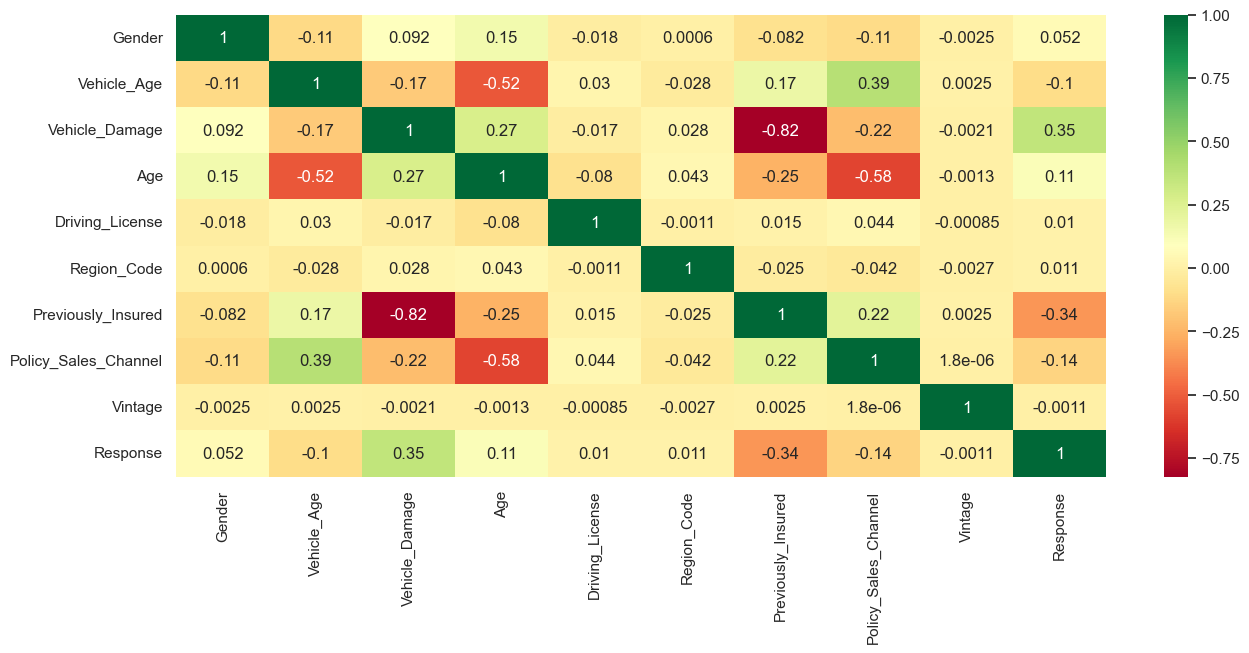

In [27]:
# to see the correlation of different attributes
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,6))
#plot Heat Map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

train_df.drop(columns=correlated_features)

,Gender,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Region_Code,Policy_Sales_Channel,Vintage,Response
0,1,2,1,44,1,28,26,217,1
1,1,0,0,76,1,3,26,183,0
2,1,2,1,47,1,28,26,27,1
3,1,1,0,21,1,11,152,203,0
4,0,1,0,29,1,41,152,39,0
...,...,...,...,...,...,...,...,...,...
381104,1,0,0,74,1,26,26,88,0
381105,1,1,0,30,1,37,152,131,0
381106,1,1,0,21,1,30,160,161,0
381107,0,2,1,68,1,14,124,74,0


In [13]:
x_train = train_df.drop('Response', axis=1)
y_train = train_df['Response']
y_train=y_train.astype(int)
y_test=target['Response']
x_test = test_df

In [14]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model= lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print ("Confussion Mtarix")
print (lr_conf_matrix)
print ("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print (classification_report(y_test,lr_predict))

Confussion Mtarix
[[126936    101]
 [     0      0]]


Accuracy of Logistic Regression: 99.92049560364303 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127037
           1       0.00      0.00      0.00         0

    accuracy                           1.00    127037
   macro avg       0.50      0.50      0.50    127037
weighted avg       1.00      1.00      1.00    127037



In [15]:
m2 = 'Naive Bayes'
nb = GaussianNB()
model=nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)
nb_acc_score = accuracy_score(y_test,nb_predict)
print ("Confussion Mtarix")
print (nb_conf_matrix)
print ("\n")
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print (classification_report(y_test,nb_predict))

Confussion Mtarix
[[66641 60396]
 [    0     0]]


Accuracy of Naive Bayes: 52.45794532301613 

              precision    recall  f1-score   support

           0       1.00      0.52      0.69    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.52    127037
   macro avg       0.50      0.26      0.34    127037
weighted avg       1.00      0.52      0.69    127037



In [28]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=10,random_state=2,max_depth=5)
model=rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_acc_score = accuracy_score(y_test,rf_predict)
print ("Confussion Matrix")
print (rf_conf_matrix)
print ("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print (classification_report(y_test,rf_predict))

Confussion Matrix
[[127037]]


Accuracy of Random Forest Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037



In [29]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=6)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predict)
dt_acc_score = accuracy_score(y_test,dt_predict)
print ("Confussion Mtarix")
print (dt_conf_matrix)
print ("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print (classification_report(y_test,dt_predict))

Confussion Mtarix
[[127037]]


Accuracy of Decision Tree Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037



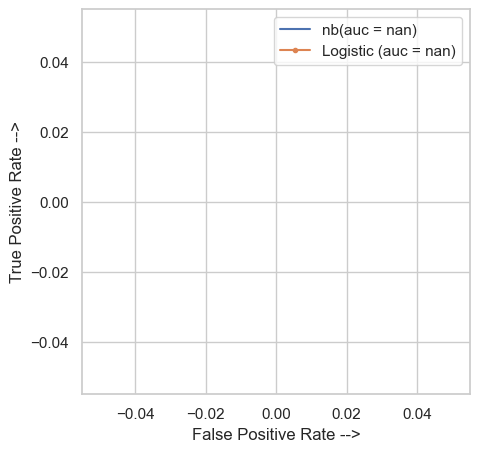

In [24]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lr_predict)
auc_logistic = auc(logistic_fpr, logistic_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, nb_predict)
auc_nb = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='nb(auc = %0.1f)' % auc_nb)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.1f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()